**Business Problem**

The objective is to maximize the return on investment (ROI) from advertising campaigns by identifying which platform — Facebook or AdWords — delivers better results in terms of clicks, conversions, and cost efficiency. Evaluating the performance of both platforms will help determine the more effective option for resource allocation and overall campaign optimization.


**Research Question**

Which advertising platform — Facebook or AdWords — demonstrates higher effectiveness in driving conversions, generating clicks, and achieving better cost efficiency?


In [280]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')


**Data Description**

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the years 2023-2025. Specifically, the data Covers a Facebook Ad campaign and an AdWords Ad campaign. There are a total of 731 lines of campaign data, one for each day from 1st April 2023 to 31st March 2025, to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:

1. Date: The date corresponding to each row of campaign data.

2. Ad Views: The number of times the ad was viewed

3. Ad Clicks: The number of clicks received on the ad.

4. Ad Conversions: The number of conversions resulting from the ad.

5. Cost per Ad: The cost associated with running the Facebook ad campaign.

6. Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.

7. Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.

8. Cost per Click (CPC): The average cost incurred per click on the ad.


In [281]:
#  loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Datasets - Personal/A_B_testing_dataset_balanced.csv')

In [282]:
# data overview
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2023-04-01,FACEBOOK AD,5174,72,19,252,1.39,26.388889,3.500000,ADWORD AD,6429,92,12,337,1.43,13.04,3.66
1,2023-04-02,FACEBOOK AD,5507,74,18,158,1.34,24.324324,2.135135,ADWORD AD,5800,71,10,277,1.22,14.08,3.90
2,2023-04-03,FACEBOOK AD,2860,42,11,177,1.47,26.190476,4.214286,ADWORD AD,8912,119,21,328,1.34,17.65,2.76
3,2023-04-04,FACEBOOK AD,3294,53,17,223,1.61,32.075472,4.207547,ADWORD AD,8648,89,16,298,1.03,17.98,3.35
4,2023-04-05,FACEBOOK AD,3130,44,11,213,1.41,25.000000,4.840909,ADWORD AD,4855,53,8,285,1.09,15.09,5.38


In [283]:
# rows and columns count of the dataset
df.shape

(731, 17)

In [284]:
# datatypes of the columns
print(df.dtypes)

date_of_campaign             object
facebook_ad_campaign         object
facebook_ad_views             int64
facebook_ad_clicks            int64
facebook_ad_conversions       int64
facebook_cost_per_ad          int64
facebook_ctr                float64
facebook_conversion_rate    float64
facebook_cost_per_click     float64
adword_ad_campaign           object
adword_ad_views               int64
adword_ad_clicks              int64
adword_ad_conversions         int64
adword_cost_per_ad            int64
adword_ctr                  float64
adword_conversion_rate      float64
adword_cost_per_click       float64
dtype: object


In [285]:
# converting date to datetime
df['date_of_campaign']=pd.to_datetime(df['date_of_campaign'])

In [286]:
#describe stats of the campaign
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2024-03-31 00:00:00,4039.283174,60.362517,14.653899,201.993160,1.493516,24.255299,3.717481,6573.377565,91.395349,10.507524,274.155951,1.390287,11.548782,3.234446
min,2023-04-01 00:00:00,2001.000000,25.000000,2.000000,100.000000,1.170000,5.882353,1.168421,4006.000000,41.000000,1.000000,150.000000,0.980000,0.890000,1.100000
25%,2023-09-30 12:00:00,3076.000000,45.000000,11.000000,154.500000,1.350000,21.739130,2.441584,5459.000000,73.000000,7.000000,215.000000,1.190000,7.875000,2.270000
50%,2024-03-31 00:00:00,3998.000000,60.000000,15.000000,206.000000,1.500000,24.358974,3.357143,6606.000000,88.000000,10.000000,274.000000,1.400000,11.360000,3.010000
75%,2024-09-29 12:00:00,5023.000000,74.500000,18.000000,250.000000,1.640000,26.666667,4.640404,7717.000000,108.000000,14.000000,336.000000,1.580000,15.045000,3.955000
max,2025-03-31 00:00:00,5993.000000,106.000000,25.000000,299.000000,1.790000,44.117647,9.785714,8979.000000,160.000000,32.000000,399.000000,1.800000,31.250000,8.470000
std,NaN,1134.948110,18.434294,5.126006,56.970949,0.169511,4.845725,1.692391,1372.678127,24.821851,5.662507,71.687872,0.228291,5.732021,1.272936


**Comparing Campaigns Performance**

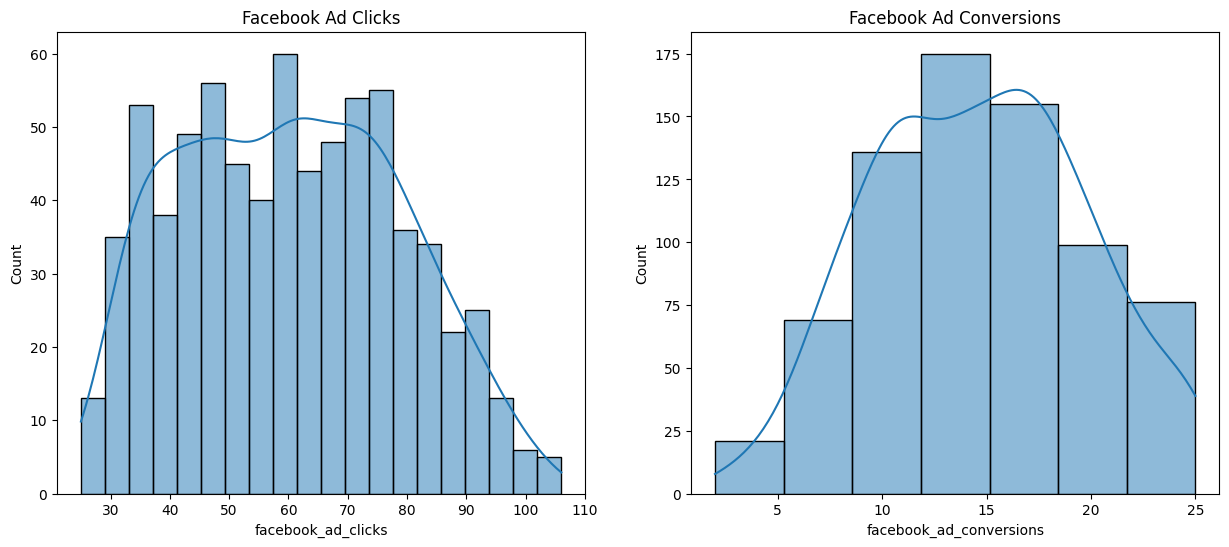

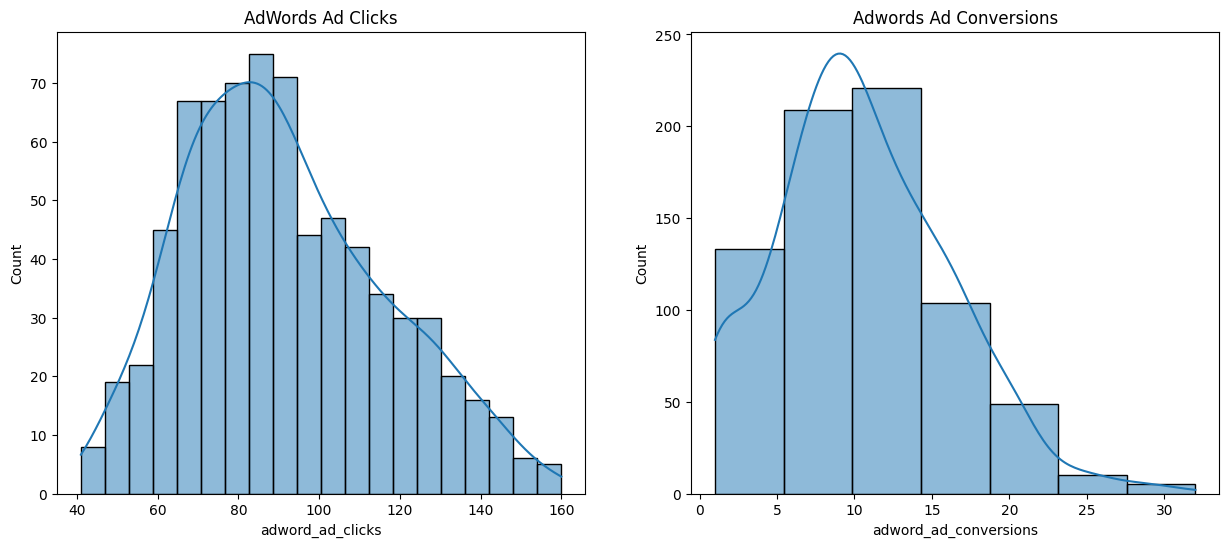

In [287]:
# distribution of_the_ clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot (1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['facebook_ad_clicks'], bins = 20, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['facebook_ad_conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['adword_ad_clicks'], bins = 20, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Adwords Ad Conversions')
sns.histplot(df['adword_ad_conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()


⚡AdWords generated more daily clicks, indicating stronger reach, while Facebook achieved higher and more consistent conversions — proving more effective at turning engagement into results and delivering better ROI.
Thus, while AdWords is better for reach and awareness, Facebook delivers higher conversion efficiency and ROI.

How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?


In [288]:
# creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
  category = []
  for conversion in df[conversion_col]:
    if conversion < 6:
      category.append("less than 6")
    elif 6 <= conversion < 11:
      category.append("6 - 10")
    elif 11 <= conversion < 16:
      category.append("10- 15")
    elif 16 <= conversion < 21:
      category.append("16 - 20")
    else:
      category.append("more than 20")
  return category


In [289]:
# applying function of different campaign's conversions
df['facebook_conversion_category'] = create_conversion_category('facebook_ad_conversions')
df['adword_conversion_category'] = create_conversion_category('adword_ad_conversions')

In [290]:
df['facebook_conversion_category'].value_counts()

,count
facebook_conversion_category,
16 - 20,231
10- 15,231
6 - 10,149
more than 20,99
less than 6,21


⚡Facebook campaign shows strong and consistent conversion performance, with most days achieving above 10 conversions, and a significant share exceeding 15 conversions, highlighting its high engagement and effectiveness.

In [291]:
df['adword_conversion_category'].value_counts()

,count
adword_conversion_category,
6 - 10,263
10- 15,193
less than 6,133
16 - 20,110
more than 20,32


⚡AdWords conversions are moderate to low on most days, with no significant high-performance days observed.

In [292]:
facebook = pd.DataFrame(df['facebook_conversion_category'].value_counts().reset_index().rename(columns={'facebook_conversion_category':'category'}))
facebook

,category,count
0,16 - 20,231
1,10- 15,231
2,6 - 10,149
3,more than 20,99
4,less than 6,21


In [293]:
adword = pd.DataFrame(df['adword_conversion_category'].value_counts().reset_index().rename(columns={'adword_conversion_category':'category'}))
adword

,category,count
0,6 - 10,263
1,10- 15,193
2,less than 6,133
3,16 - 20,110
4,more than 20,32


In [294]:
category_df=pd.merge(facebook,adword,on=['category'],how='outer').fillna(0)
category_df

,category,count_x,count_y
0,10- 15,231,193
1,16 - 20,231,110
2,6 - 10,149,263
3,less than 6,21,133
4,more than 20,99,32


In [295]:
category_df=category_df.iloc[[3,2,0,1,4]]
category_df

,category,count_x,count_y
3,less than 6,21,133
2,6 - 10,149,263
0,10- 15,231,193
1,16 - 20,231,110
4,more than 20,99,32


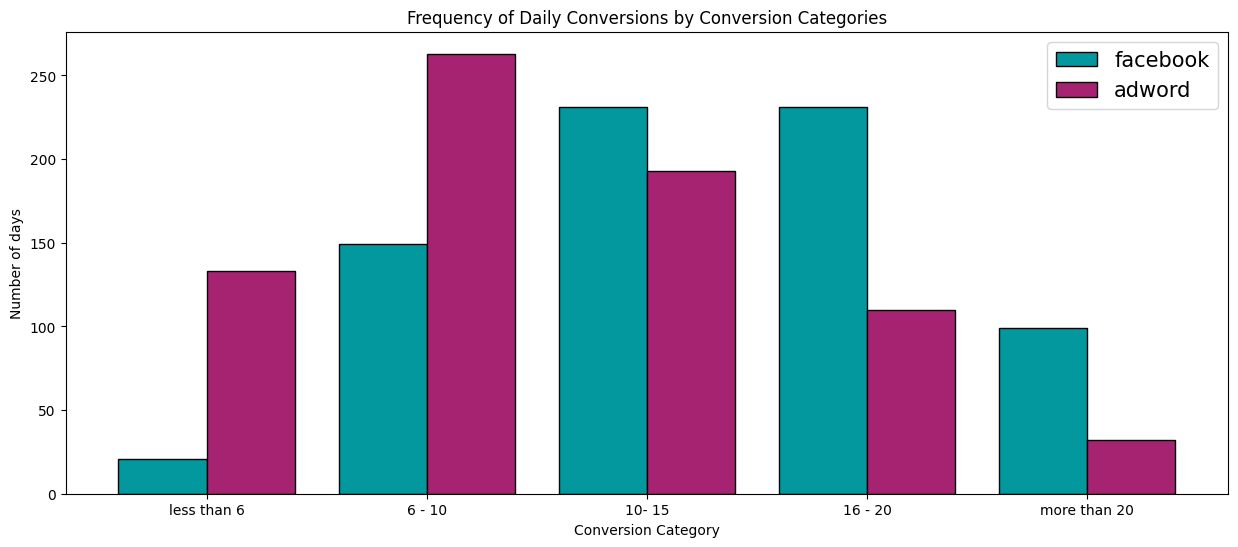

In [296]:
X_axis=np.arange(len(category_df))
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'],0.4,label='facebook',color='#03989E',linewidth=1,edgecolor='k')
plt.bar(X_axis + 0.2, category_df['count_y'],0.4,label='adword',color='#A62372',linewidth=1,edgecolor='k')
plt.xticks(X_axis, category_df['category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of days")
plt.title("Frequency of Daily Conversions by Conversion Categories")
plt. legend(fontsize = 15)
plt.show()


⚡Insights
1. **AdWords** recorded more days with **low to moderate conversions (below 10)**, showing consistent but limited performance.
2. **Facebook** achieved **higher conversion volumes**, with many days crossing **10–15 and even 15+ conversions**, reflecting stronger engagement effectiveness.
3. The **distribution gap** highlights that while AdWords ensures steady reach, **Facebook delivers higher-impact results** on more days, making it the more conversion-efficient platform.


Do more clicks on the ad really lead to more sales?

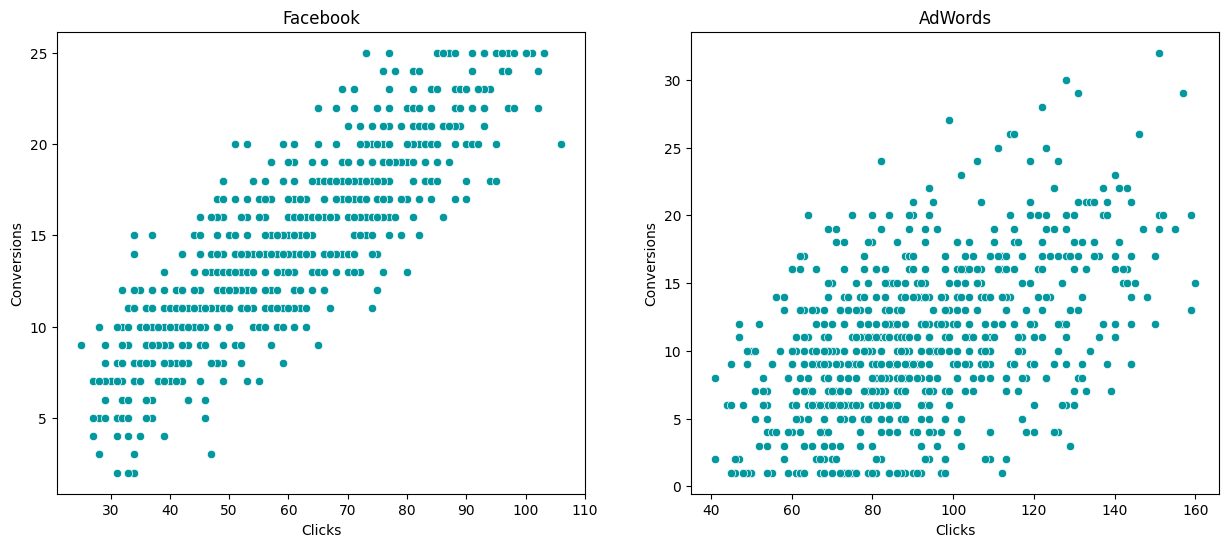

In [297]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook")
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'],color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['adword_ad_clicks'],y = df['adword_ad_conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()


In [298]:
facebook_corr = df[['facebook_ad_conversions','facebook_ad_clicks']].corr()
facebook_corr

,facebook_ad_conversions,facebook_ad_clicks
facebook_ad_conversions,1.00000,0.87205
facebook_ad_clicks,0.87205,1.00000


In [299]:
adword_corr = df[['adword_ad_conversions','adword_ad_clicks']].corr()
adword_corr

,adword_ad_conversions,adword_ad_clicks
adword_ad_conversions,1.000000,0.483033
adword_ad_clicks,0.483033,1.000000


⚡Insights:

1. The Facebook campaign shows a strong positive correlation (r = 0.87) between ad clicks and conversions, indicating that more clicks generally lead to more sales or desired actions.

2. The AdWords campaign, however, has a weaker correlation (r = 0.48), suggesting that increased clicks do not consistently translate into conversions — users may click without completing the desired action.

**Hypothesis Testing**

Hypothesis: Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.


HO: u_Facebook <= u_AdWords

H1: u_Facebook > u_AdWords


Null Hypothesis (H0): There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

Alternate Hypothesis (H1): The number of conversions from Facebook is greater than the number of conversions from AdWords.


In [300]:
print('Mean Conversion \n------------------------')
print('Facebook: ', round(df['facebook_ad_conversions'].mean(),2))
print('Adwords: ',round(df['adword_ad_conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a=df['facebook_ad_conversions'], b=df['adword_ad_conversions'],equal_var=False)
print('\nT statistic',t_stats, '\np-value',p_value)

#comparing the p-value with the significance of 5% or 0.05
if p_value<0.05:
  print("\np-value is less than significance value, Reject null hypothesis")
else:
  print("\np-value is greater than significance value, Accept null hypothesis")

Mean Conversion 
------------------------
Facebook:  14.65
Adwords:  10.51

T statistic 14.67723729925724 
p-value 1.4409618163103636e-45

p-value is less than significance value, Reject null hypothesis


⚡ The analysis clearly shows that Facebook ads produce significantly more conversions than AdWords ads.
The difference is statistically significant (p < 0.05), meaning it’s not due to random variation.
Therefore, Facebook is the more effective platform for driving conversions, while AdWords remains useful for reach and visibility.
Businesses should consider reallocating more budget or strategy toward Facebook to maximize ROI.

**Regression Analysis**

What will happen if I do go with the facebook ads? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [301]:
X=df[['facebook_ad_clicks']]
y=df[['facebook_ad_conversions']]

reg_model=LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

r2 = r2_score(y,prediction)*100
mse = mean_squared_error(y,prediction)
print("Accuracy (r2 score): ",round(r2,2),"%")
print("Mean Squared Error: ",round(mse,2))

Accuracy (r2 score):  76.05 %
Mean Squared Error:  6.29


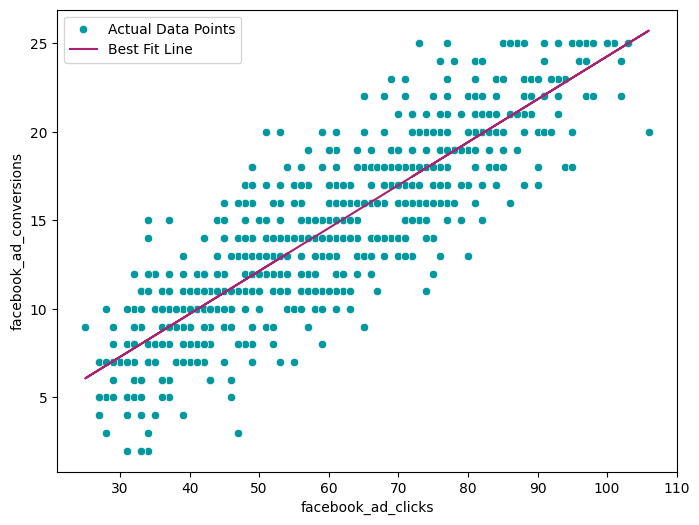

In [302]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['facebook_ad_clicks'],y=df['facebook_ad_conversions'], color='#03989E', label='Actual Data Points')
plt.plot(df['facebook_ad_clicks'], prediction, color='#A62372', label='Best Fit Line')
plt.legend()
plt.show()

In [303]:
print(f'For {50} clicks, expected conversion: {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} clicks, expected conversion: {round(reg_model.predict([[80]])[0][0],2)}')

For 50 clicks, expected conversion: 12.14
For 80 clicks, expected conversion: 19.42


⚡Insights:

1. The model has a reasonably good predictive power, with an R2 score of 76%. This suggests that it can effectively predict Facebook ad conversions based on the number of facebook ad clicks.
2. With the insights provided bythe Linear Regression model, businesses can make informed decisions about resource allocation, budget planning and campaign optimization.
3. For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

**Analyzing Facebook Campaign Metrics over time**

In [304]:
df1 = df.copy()

In [305]:
df = df.iloc[:,:9]
df

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click
0,2023-04-01,FACEBOOK AD,5174,72,19,252,1.39,26.388889,3.500000
1,2023-04-02,FACEBOOK AD,5507,74,18,158,1.34,24.324324,2.135135
2,2023-04-03,FACEBOOK AD,2860,42,11,177,1.47,26.190476,4.214286
3,2023-04-04,FACEBOOK AD,3294,53,17,223,1.61,32.075472,4.207547
4,2023-04-05,FACEBOOK AD,3130,44,11,213,1.41,25.000000,4.840909
...,...,...,...,...,...,...,...,...,...
726,2025-03-27,FACEBOOK AD,2775,43,10,184,1.55,23.255814,4.279070
727,2025-03-28,FACEBOOK AD,4652,70,18,276,1.50,25.714286,3.942857
728,2025-03-29,FACEBOOK AD,5993,81,19,291,1.35,23.456790,3.592593
729,2025-03-30,FACEBOOK AD,5017,75,16,161,1.49,21.333333,2.146667


At what times of months or days of the week do we observe the most conversions?

In [306]:
df['month']=df['date_of_campaign'].dt.month
df['week']=df['date_of_campaign'].dt.weekday
df['year']=df['date_of_campaign'].dt.year

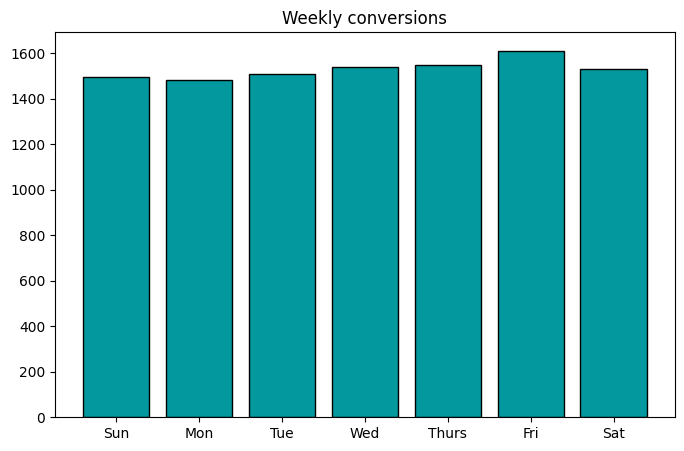

In [307]:
plt.figure(figsize=(8,5))
plt.title('Weekly conversions')
weekly_conv = df.groupby('week')['facebook_ad_conversions'].sum().reset_index()
week_names=['Sun','Mon','Tue','Wed','Thurs','Fri','Sat']
plt.bar(week_names,weekly_conv['facebook_ad_conversions'],color='#03989E',edgecolor='k')
plt.show()

⚡The graph indicates a highly consistent performance throughout the week, with conversions staying tightly within the 1480–1600 range. There is a slight upward trend building towards a peak of over 1600 conversions on Friday. Saturday sees a minor drop-off, bringing it back in line with mid-week performance.

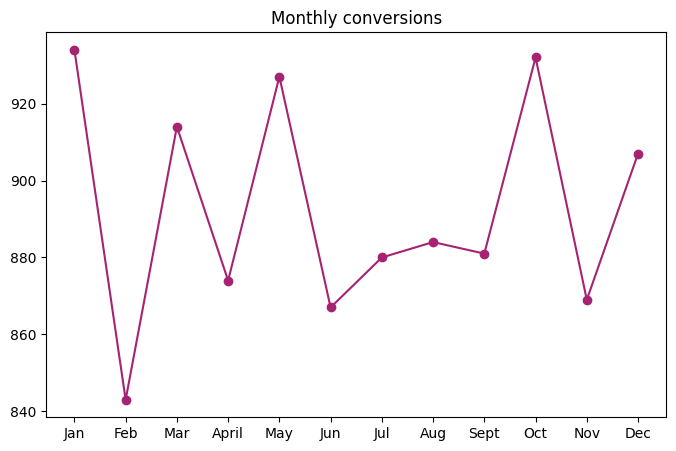

In [308]:
plt.figure(figsize=(8,5))
plt.title('Monthly conversions')
monthly_conv = df.groupby('month')['facebook_ad_conversions'].sum().reset_index()
month_names=['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.plot(month_names,monthly_conv['facebook_ad_conversions'],'-o',color='#A62372')
plt.show()

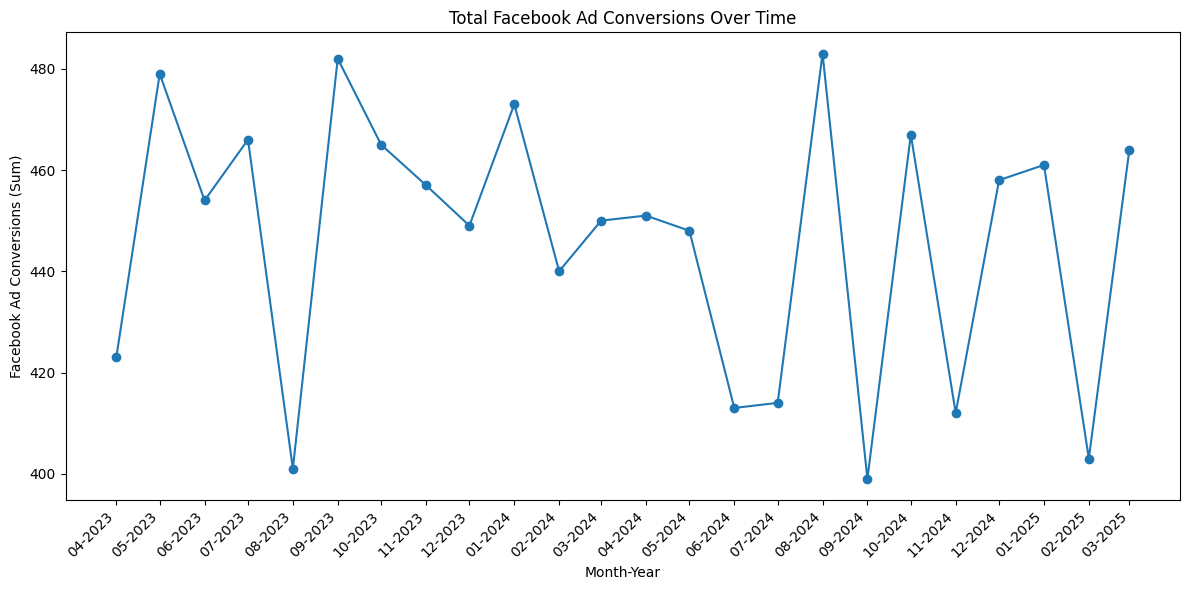

In [309]:
yearly_conv = df.groupby(['month','year'])['facebook_ad_conversions'].sum().reset_index()
yearly_conv['date'] = pd.to_datetime(yearly_conv['year'].astype(str) + '-' + yearly_conv['month'].astype(str) + '-' + '01')
yearly_conv['month-year'] = yearly_conv['date'].dt.strftime('%m-%Y')
yearly_conv = yearly_conv.sort_values(by='date', ascending=True)

plt.figure(figsize=(12, 6))
plt.plot(yearly_conv['date'], yearly_conv['facebook_ad_conversions'], marker='o', linestyle='-')
plt.xlabel("Month-Year")
plt.ylabel("Facebook Ad Conversions (Sum)")
plt.title("Total Facebook Ad Conversions Over Time")
plt.xticks(yearly_conv['date'], yearly_conv['month-year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

⚡The trend line exhibits extreme volatility in conversions (ranging from 400 to 480) with no discernible long-term trend across 2023-2025. The sharp peaks are immediately followed by significant drops, indicating a highly unstable performance cycle. This pattern suggests potential issues with ad fatigue or audience saturation, making campaign results highly unpredictable month over month.

How does the Cost Per Conversion (CPC) trend over time?

This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing then to optimize their spending and targeting strategies effectively.

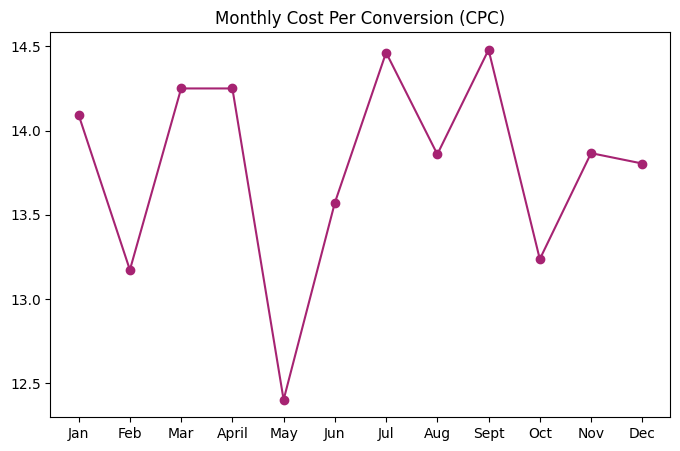

In [310]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_df['cost_per_conv']=monthly_df['facebook_cost_per_ad']/monthly_df['facebook_ad_conversions']
plt.plot(month_names,monthly_df['cost_per_conv'],'-o', color='#A62372')
plt.show()

⚡The graph shows high volatility with no consistent trend; the lowest CPC is in May (\~12.45), while costs peak in July and September (\~14.45). This suggests strong seasonal cost fluctuations. Scale campaign budgets aggressively in May for efficient conversion acquisition; review targeting and spend efficiency in July and September to manage high costs.

Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggest a stable, proportional impact of budget changes on conversions over time?

Meaning, If I spend 'X' amount of money, can I always count on getting 'Y' conversions, both now and in the future?

H0: There is no long-term equilibrium relationship between advertising spend and conversion rates

H1: There is long-term equilibrium relationship between advertising spend and conversion rates

In [311]:
score,p_value,_ = coint(df['facebook_cost_per_ad'],df['facebook_ad_conversions'])
print('Cointegration test score: ',score)
print('p-value: ',p_value)
if p_value<0.05:
  print("\np-value is less than significance value, Reject null hypothesis")
else:
  print("\np-value is greater than significance value, Accept null hypothesis")

Cointegration test score:  -12.397990468820412
p-value:  5.102067231967493e-22

p-value is less than significance value, Reject null hypothesis


⚡The statistical test confirms a stable, long-term equilibrium relationship between advertising costs and conversions (p-value < 0.05). This means that budget changes have a predictable, proportional impact on conversions over time.
Businesses can confidently scale advertising budgets up or down, as the data supports a reliable and stable return on investment (ROI) relationship.